<a href="https://colab.research.google.com/github/devika-su-resh/ADBMS-LAB/blob/main/json_notes2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
import json

In [151]:
students = [
    {"id":1,"name":"anita","class":"10A","marks":{"maths":85,"science":92,"english":88}},
    {"id":2,"name":"raj","class":"10A","marks":{"maths":78,"science":74,"english":80}},
    {"id":3,"name":"fathima","class":"10B","marks":{"maths":91,"science":89,"english":95}},
]

In [152]:
with open("students.json","w") as f:
  json.dump(students,f,indent=3)

In [153]:
with open("students.json","r") as f:
  data = json.load(f)
  print(data)

[{'id': 1, 'name': 'anita', 'class': '10A', 'marks': {'maths': 85, 'science': 92, 'english': 88}}, {'id': 2, 'name': 'raj', 'class': '10A', 'marks': {'maths': 78, 'science': 74, 'english': 80}}, {'id': 3, 'name': 'fathima', 'class': '10B', 'marks': {'maths': 91, 'science': 89, 'english': 95}}]


In [154]:
df = pd.json_normalize(data,sep="_")
print(df)

   id     name class  marks_maths  marks_science  marks_english
0   1    anita   10A           85             92             88
1   2      raj   10A           78             74             80
2   3  fathima   10B           91             89             95


In [155]:
new_student = {
    "id":4,"name":"nisha","class":"10B","marks":{"maths":88,"science":90,"english":87}
}
students.append(new_student)
with open("students.json","w") as f:
  json.dump(students,f,indent=4)
with open("students.json","r") as f:
  data = json.load(f)
  print(data)


[{'id': 1, 'name': 'anita', 'class': '10A', 'marks': {'maths': 85, 'science': 92, 'english': 88}}, {'id': 2, 'name': 'raj', 'class': '10A', 'marks': {'maths': 78, 'science': 74, 'english': 80}}, {'id': 3, 'name': 'fathima', 'class': '10B', 'marks': {'maths': 91, 'science': 89, 'english': 95}}, {'id': 4, 'name': 'nisha', 'class': '10B', 'marks': {'maths': 88, 'science': 90, 'english': 87}}]


In [156]:
df=pd.json_normalize(data,sep=".")
print(df)

   id     name class  marks.maths  marks.science  marks.english
0   1    anita   10A           85             92             88
1   2      raj   10A           78             74             80
2   3  fathima   10B           91             89             95
3   4    nisha   10B           88             90             87


In [157]:
data = [students for students in data if students["id"] != 3]
df = pd.json_normalize(data,sep="_")
print(df)

   id   name class  marks_maths  marks_science  marks_english
0   1  anita   10A           85             92             88
1   2    raj   10A           78             74             80
2   4  nisha   10B           88             90             87


In [158]:
df.to_csv("students.csv",index=False)

In [159]:
df=pd.read_csv("students.csv")
print(df)

   id   name class  marks_maths  marks_science  marks_english
0   1  anita   10A           85             92             88
1   2    raj   10A           78             74             80
2   4  nisha   10B           88             90             87


In [160]:
import seaborn as sns
import matplotlib.pyplot as plt


In [161]:
sns.set(style="whitegrid")

In [162]:
df.rename(columns={
    "marks_maths": "Math",
    "marks_science": "Science",
    "marks_english": "English"
}, inplace=True)
print(df)

   id   name class  Math  Science  English
0   1  anita   10A    85       92       88
1   2    raj   10A    78       74       80
2   4  nisha   10B    88       90       87


In [163]:
avg_scores = df[["Math", "Science", "English"]].mean().reset_index()
avg_scores.columns = ["Subject", "Average Score"]

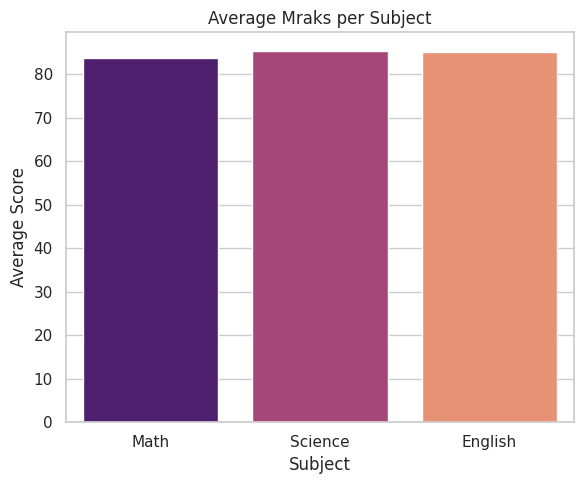

In [164]:
plt.figure(figsize=(6,5))
sns.barplot(data=avg_scores, x="Subject", y="Average Score", hue="Subject", palette="magma",legend=False)
plt.title("Average Mraks per Subject")
plt.tight_layout()
plt.show()

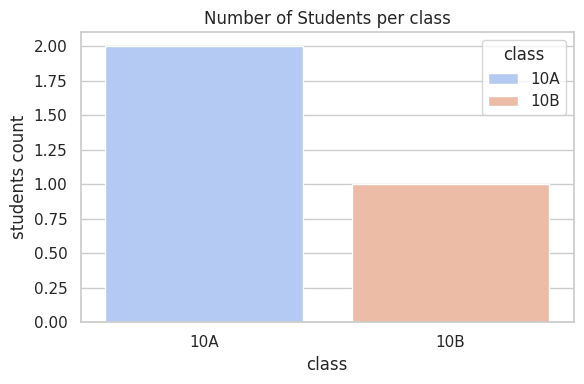

In [165]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="class", hue="class", palette="coolwarm", legend=True)
plt.title("Number of Students per class")
plt.xlabel("class")
plt.ylabel("students count")
plt.tight_layout()
plt.show()

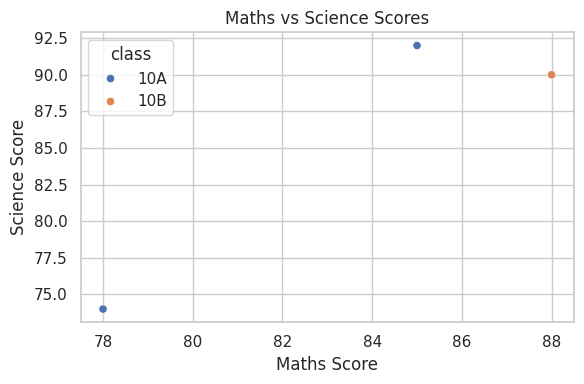

In [169]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Math", y="Science", hue="class", palette="deep", legend=True)
plt.title("Maths vs Science Scores")
plt.xlabel("Maths Score")
plt.ylabel("Science Score")
plt.tight_layout()
plt.show()

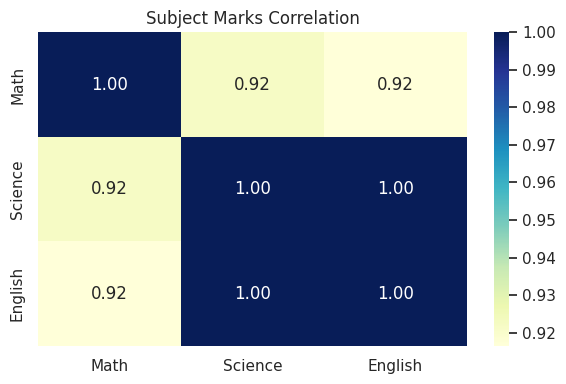

In [171]:
plt.figure(figsize=(6,4))
corr = df[["Math", "Science", "English"]].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu",fmt=".2f")
plt.title("Subject Marks Correlation")
plt.tight_layout()
plt.show()